In [1]:
import pandas as pd
import numpy as np
import os
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Dataset:

In [2]:
DATA_path= 'https://raw.githubusercontent.com/RodrigoAcev/OBESITY_LEVELS/master/data/ObesityDataSet_raw_and_data_sinthetic.csv'

In [3]:
df = pd.read_csv(DATA_path)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Transformación variables categóricas:

In [4]:
#Nombre de columnas con datos categoricos y numericos:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
            'SCC', 'CALC', 'MTRANS']

num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [5]:
#Diccionario con clases 
class_dict = {'Insufficient_Weight': 0,
              'Normal_Weight': 1,
              'Overweight_Level_I': 2,
              'Overweight_Level_II': 3,
              'Obesity_Type_I': 4,
              'Obesity_Type_II': 5,
              'Obesity_Type_III': 6}

inv_class = dict((v_i,k_i) for k_i, v_i in class_dict.items())
#inv_class

df['NObeyesdad'] = df['NObeyesdad'].apply(lambda x: class_dict[x])

In [6]:
#Diccionario para transformacion de variables categoricas a numericas:
attr_dic = {'yes':1,
            'no':0,
            'Sometimes':1,
            'Frequently':2,
            'Always':3,
            'Male':0,
            'Female':1,
            'Walking':0,
            'Bike':1,
            'Public_Transportation':2,
            'Motorbike':3,
            'Automobile':4
           }

In [7]:
df.replace(attr_dic, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

## Train & Test Split

In [8]:
X = df.drop('NObeyesdad', axis=1).copy()
y = df['NObeyesdad'].copy()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((1688, 16), (423, 16))

## Normalización de datos

In [10]:
from sklearn.preprocessing import StandardScaler

#Normalizacion datos categoricos:
scaler_cat = StandardScaler()
X_train.loc[:,cat_cols] = scaler_cat.fit_transform(X_train.loc[:,cat_cols].values)

#Normalizacion datos numericos:
scaler_num = StandardScaler()
X_train.loc[:,num_cols] = scaler_num.fit_transform(X_train.loc[:,num_cols].values)
X_train.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03
mean,6.314065e-17,1.504852e-16,-4.967064e-16,-4.998634e-16,-1.473282e-17,1.347000e-16,-4.072572e-16,6.866545e-16,1.378571e-16,3.893673e-17,2.567720e-16,5.524807e-17,-1.589040e-16,1.983669e-16,-7.787346e-17,-1.041821e-16
std,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00
min,-9.976331e-01,-1.474967e+00,-2.692580e+00,-1.819299e+00,-2.129419e+00,-2.759030e+00,-2.659811e+00,-2.150047e+00,-2.423677e+00,-1.455116e-01,-1.655005e+00,-2.215825e-01,-1.185094e+00,-1.069742e+00,-1.397473e+00,-2.603713e+00
25%,-9.976331e-01,-6.919806e-01,-7.709508e-01,-7.810441e-01,4.696116e-01,3.624463e-01,-7.811726e-01,-4.719466e-02,-2.917506e-01,-1.455116e-01,-6.591605e-01,-2.215825e-01,-1.051606e+00,-1.069742e+00,-1.397473e+00,-4.263201e-01
50%,-9.976331e-01,-2.397809e-01,2.187898e-05,-1.430424e-01,4.696116e-01,3.624463e-01,-1.381681e-01,4.083130e-01,-2.917506e-01,-1.455116e-01,-1.485667e-02,-2.215825e-01,2.017320e-03,-5.807430e-02,5.219202e-01,-4.263201e-01
75%,1.002372e+00,2.676076e-01,7.057043e-01,7.961633e-01,4.696116e-01,3.624463e-01,1.097466e+00,4.083130e-01,-2.917506e-01,-1.455116e-01,7.710986e-01,-2.215825e-01,7.803043e-01,5.780955e-01,5.219202e-01,-4.263201e-01
max,1.002372e+00,5.812162e+00,3.015736e+00,3.028093e+00,4.696116e-01,3.624463e-01,1.097466e+00,1.687493e+00,3.972103e+00,6.872305e+00,1.625291e+00,4.512991e+00,2.376240e+00,2.225933e+00,4.360706e+00,1.751073e+00


In [11]:
#Guardar scalers:
if not(os.path.exists('./Scalers/')):
    os.mkdir('./Scalers/')

with open('./Scalers/scaler_cat.scaler', 'wb') as f:
    pk.dump(scaler_cat, f)

with open('./Scalers/scaler_num.scaler', 'wb') as f:
    pk.dump(scaler_num, f)

## PCA

In [12]:
from sklearn.decomposition import PCA

obs_pca = PCA().fit(X_train)
obs_pca.components_.shape

(16, 16)

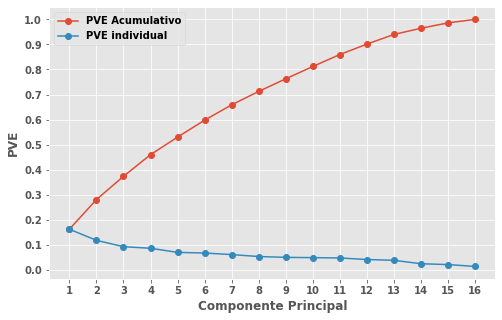

In [13]:
fig, axs = plt.subplots(figsize=(8,5))

pca_pve = obs_pca.explained_variance_ratio_
x_axis = np.arange(1, obs_pca.components_.shape[0]+1)

axs.plot(x_axis, np.cumsum(pca_pve), 'o-', label='PVE Acumulativo')
axs.plot(x_axis, pca_pve, 'o-', label='PVE individual')

axs.set_yticks(np.arange(0,1.1,.1))
axs.set_xticks(x_axis)
axs.set_ylabel('PVE')
axs.set_xlabel('Componente Principal')

plt.legend()
plt.show()

In [14]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
442,-0.997633,0.267608,0.215430,-0.819498,0.469612,0.362446,-0.781173,0.408313,-0.291751,-0.145512,-0.014857,-0.221583,-1.185094,0.578096,0.521920,-2.603713
253,1.002372,0.267608,-1.184723,-1.511668,0.469612,0.362446,-0.781173,-2.150047,-0.291751,-0.145512,-0.014857,-0.221583,-1.185094,2.225933,0.521920,-0.426320
554,-0.997633,-1.285160,-0.096836,-1.295197,-2.129419,0.362446,-0.781173,-0.869606,-0.291751,-0.145512,1.090332,-0.221583,-0.006352,-0.287289,0.521920,-0.426320
1500,-0.997633,0.026979,-0.417041,0.170496,0.469612,0.362446,-1.320627,0.408313,-0.291751,-0.145512,-1.389050,-0.221583,-0.640232,0.389471,-1.397473,1.751073
359,1.002372,1.376519,-1.507835,-1.473214,0.469612,-2.759030,-0.781173,0.408313,-0.291751,-0.145512,-0.014857,-0.221583,0.002017,-1.069742,0.521920,-0.426320


In [15]:
pd.DataFrame(obs_pca.transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.044756,0.931898,-0.647872,-1.461541,0.771175,0.403271,-0.159807,-0.535154,-0.428420,1.370138,0.270355,-0.203266,0.023423,0.276096,2.076397,-0.894830
1,1.515010,-1.002006,-0.896119,-2.513083,0.584905,0.796780,1.070197,0.889552,-0.458331,-0.795196,0.855268,1.135727,-0.289009,-0.314869,0.637485,-0.731157
2,1.073595,1.225528,0.521122,-1.111005,-0.260766,1.828603,-1.368693,-0.276429,-0.479369,-0.856968,0.329954,-0.845552,0.860266,-0.384113,0.068074,0.211669
3,-0.523199,-1.003478,1.782459,-1.529944,0.108863,-1.084376,0.346453,0.568763,0.403732,0.879879,-0.573756,-0.014428,0.356966,-0.293053,-0.596919,0.928034
4,1.765217,-1.307075,0.611467,0.958090,-0.899750,0.488857,0.002086,-0.592849,-2.060441,1.222090,-0.601282,1.218511,-1.222910,-0.036016,0.861142,-0.606174


In [16]:
#Guardar modelo de PCA:
if not(os.path.exists('./Modelos/')):
    os.mkdir('./Modelos/')

with open('./Modelos/pca_model.pk', 'wb') as f:
    pk.dump(obs_pca, f)

In [17]:
#usar los 16 componentes principales para primera iteracion:
X_train = obs_pca.transform(X_train)
X_train.shape

(1688, 16)

## Multinomial Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

params_dict = {'multi_class': ['multinomial'],
               'penalty': ['l1', 'l2', 'elasticnet'],
               'C': np.arange(0.1,101,.1),
               'class_weight': ['balanced'],
               'solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
              }

model = LogisticRegression()

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

12108

In [19]:
#Random search:
random_cv = RandomizedSearchCV(LogisticRegression(), 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=120,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'class_weight': 'balanced',
 'C': 88.0}

In [20]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

0.9757109004739336

In [21]:
params_dict = {'multi_class': ['multinomial'],
               'penalty': ['l2'],
               'C': np.arange(50,91,5),
               'class_weight': ['balanced'],
               'solver' : ['lbfgs']
              }
combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

9

In [22]:
#GridSearch:
model = LogisticRegression()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([50, 55, 60, 65, 70, 75, 80, 85, 90]),
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1_macro', verbose=2)

In [23]:
grid_cv.best_params_, grid_cv.best_score_

({'C': 70,
  'class_weight': 'balanced',
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'lbfgs'},
 0.9523066273157268)

In [24]:
lgr_model = LogisticRegression(**grid_cv.best_params_, random_state=42)
lgr_model.fit(X_train, y_train)

LogisticRegression(C=70, class_weight='balanced', multi_class='multinomial',
                   random_state=42)

In [25]:
f1_score(y_train, lgr_model.predict(X_train), average='macro')

0.9742305542414001

In [26]:
#Preparar datos de prueba:
X_test.loc[:, cat_cols] = scaler_cat.transform(X_test.loc[:,cat_cols].values)
X_test.loc[:, num_cols] = scaler_num.transform(X_test.loc[:,num_cols].values)

X_test = obs_pca.transform(X_test)
X_test.shape

(423, 16)

In [27]:
y_hat = lgr_model.predict(X_test)
f1_score(y_test, y_hat, average='macro')

0.9443603334698233

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        54
      Normal_Weight       0.93      0.90      0.91        58
 Overweight_Level_I       0.93      0.86      0.89        58
Overweight_Level_II       0.92      0.93      0.92        58
     Obesity_Type_I       0.94      0.97      0.96        70
    Obesity_Type_II       0.95      0.98      0.97        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.95       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423



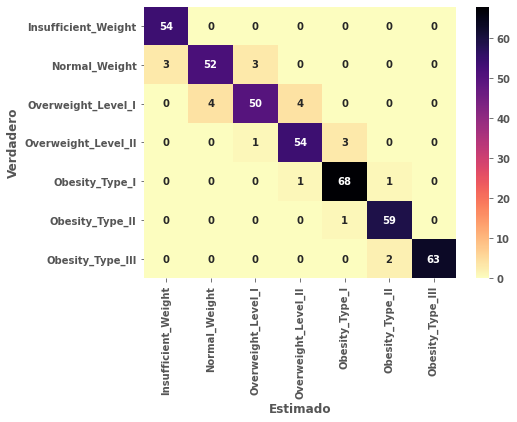

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def GraficaCM(y_test, y_hat, class_dict):

    labels_classes = list(class_dict.keys())
    
    cm = confusion_matrix(y_test, y_hat)

    print(classification_report(y_test, y_hat, target_names=labels_classes))

    fig, axs = plt.subplots(figsize=(7,5))

    sns.heatmap(cm, annot=True, ax=axs, cmap='magma_r')

    axs.set_yticks(np.arange(len(labels_classes))+.5)
    axs.set_xticks(np.arange(len(labels_classes))+.5)

    axs.set_xticklabels(labels_classes, rotation=90)
    axs.set_yticklabels(labels_classes, rotation=0)

    axs.set_ylabel('Verdadero')
    axs.set_xlabel('Estimado')

    plt.show()
    
GraficaCM(y_test, y_hat, class_dict)

## Decision Trees

## SVM